## Function read data

In [1]:
import pandas as pd

def read_data(sheet_names):
    df = []
    for name in sheet_names:
        cur_df = pd.read_excel("./Du lieu mo hinh.xlsx", sheet_name=name)

        df.append(cur_df)
    return pd.concat(df, axis=0)

In [2]:
df = read_data(["Wholesale Trade"])
name = "Wholesale Trade"
print(len(df))
df.head(10)


240


,Industry,Company,Year,EV,MC,PB,TQ,Leverage,Quality,Size,ROA,Growth,Tangibility,Liquidity,GDP,Inflation
0,2.0,AMV,2012,6.717105,5.924100,0.284,0.247,0.130597,0.013940,3.177773,-2.21,-0.146207,0.728781,3.17,0.0525,0.0910
1,NaN,AMV,2013,15.065010,15.233400,0.725,0.563,0.223294,0.017044,3.297431,0.54,0.127111,0.650373,2.09,0.0542,0.0660
2,NaN,AMV,2014,18.828032,8.039850,0.676,0.318,0.530227,-0.193785,3.231228,-37.32,-0.064060,0.648845,4.32,0.0598,0.0409
3,NaN,AMV,2015,16.185163,7.193550,0.640,0.328,0.487199,0.012558,3.087011,-2.99,-0.134300,0.641665,2.48,0.0668,0.0063
4,NaN,AMV,2016,23.589285,19.253325,1.598,0.943,0.410037,0.083171,3.016563,3.97,-0.068023,0.485794,2.99,0.0621,0.0267
5,NaN,AMV,2017,528.282167,496.218225,1.412,1.195,0.153767,0.095349,6.028967,9.44,19.336238,0.079317,13.33,0.0681,0.0352
6,NaN,AMV,2018,955.305484,1030.398500,1.807,1.581,0.125133,0.340738,6.479562,33.71,0.569246,0.471129,5.36,0.0708,0.0354
7,NaN,AMV,2019,968.598966,930.070102,1.175,1.067,0.092188,0.259498,6.770766,25.77,0.338036,0.824833,4.14,0.0702,0.0280
8,NaN,ARM,2012,11.597151,45.891498,1.070,0.360,0.663378,0.115289,4.847052,10.67,-0.115818,0.082568,3.47,0.0525,0.0910
9,NaN,ARM,2013,31.753228,52.114074,1.337,0.513,0.616381,0.103968,4.620877,10.35,-0.202421,0.086472,3.74,0.0542,0.0660


## Descriptive Statistic

In [3]:
import pandas as pd
import scipy.stats as stats

def stats_summary(df):
    """Calculates the mean, max, min, skewness, kurtosis, and Jarque-Bera probability
    of each column in a pandas dataframe.
    """
    summary = pd.DataFrame()
    for col in ['EV', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'Inflation']:
        data = df[col]
        mean = data.mean()
        max_ = data.max()
        min_ = data.min()
        stdev = data.std()
        skewness = data.skew()
        kurtosis = data.kurtosis()
        jb_prob = stats.jarque_bera(data)[1]
        summary[col] = [mean, max_, min_, stdev, skewness, kurtosis, jb_prob]
    summary.index = ['mean', 'max', 'min', 'stdev', 'skewness', 'kurtosis', 'Jarque-Bera Prob.']
    return summary

In [4]:
stats_summary(df)

,EV,MC,PB,TQ,Leverage,Quality,Size,ROA,Growth,Tangibility,Liquidity,Inflation
mean,6.118692e+02,375.989279,0.903783,3.937458e-01,0.548606,5.813076e-02,6.431241,5.330292e+00,0.204008,3.424258e-01,2.006042,0.041188
max,4.923911e+03,3408.505511,5.785000,2.710000e+00,0.970612,5.979819e-01,9.184819,6.102000e+01,19.336238,9.080006e-01,25.950000,0.091000
min,-1.141201e+03,3.800000,0.105000,2.000000e-02,0.027050,-2.967949e-01,3.016563,-3.732000e+01,-0.700265,1.563713e-02,0.430000,0.006300
stdev,7.742647e+02,538.458980,0.714138,3.652025e-01,0.227246,8.872251e-02,1.369123,9.913373e+00,1.312039,2.237418e-01,2.659627,0.024462
skewness,2.192918e+00,3.122948,3.032157,2.407072e+00,-0.583615,5.101549e-01,-0.264347,9.238732e-01,13.218120,8.859199e-01,5.821238,0.784014
kurtosis,7.345122e+00,12.250176,13.936884,8.253896e+00,-0.338984,8.022876e+00,-0.291915,1.079590e+01,191.271512,-2.177590e-01,40.229985,-0.128697
Jarque-Bera Prob.,1.507588e-153,0.000000,0.000000,2.013703e-191,0.000634,3.763266e-136,0.155204,1.282085e-249,0.000000,1.395688e-07,0.000000,0.000005


In [5]:
len(df)

240

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# fit a multiple linear regression model
# data_train = [df[df['Year'] < 2015], df[df['Year'] < 2016], df[df['Year'] < 2017], df[df['Year'] < 2018], df[df['Year'] < 2019]]
# data_test = [df[df['Year'] == 2015], df[df['Year'] == 2016], df[df['Year'] == 2017], df[df['Year'] == 2018], df[df['Year'] == 2019]]

# X_train = [data[['EVL', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'Inflation']] for data in data_train]
# y_train = [data['EV'] for data in data_train]

# X_test = [data[['EVL', 'MC', 'PB', 'TQ', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity', 'Inflation']] for data in data_test]
# y_test = [data['EV'] for data in data_test]

# # create a MinMaxScaler object
data = df[['EV', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']]
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns=['EV', 'Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity'])

# Splitting the DataFrame into train and test sets
train_df, test_df = train_test_split(scaled_df, test_size=0.3, random_state=42)
X_train = train_df[['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']]
X_test = test_df[['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']]

y_train = train_df['EV']
y_test = test_df['EV']



In [7]:
X_train.head(10)
print(len(X_train))

168


In [8]:
data = {
    "LM": [],
    "Lasso": [],
    "GAM": [], 
    "RF": [],
    "GBM": [],
    "NNET": []
}

In [9]:
from sklearn.linear_model import LinearRegression

data['LM'] = []
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2


r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["LM"].append(round(r_squared*100, 4))
data["LM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

coefficients = model.coef_
# Get the variable names
variable_names = ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']

# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# Print the variable importance
print(variable_importance)


R-squared 0.4220036605762618
RMSE 0.014668033013467764
      Variable  Coefficient
0     Leverage         0.01
5  Tangibility         2.41
3          ROA         7.69
1      Quality        27.17
4       Growth        60.22
6    Liquidity        98.04
2         Size       100.00


/tmp/ipykernel_7264/385619033.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


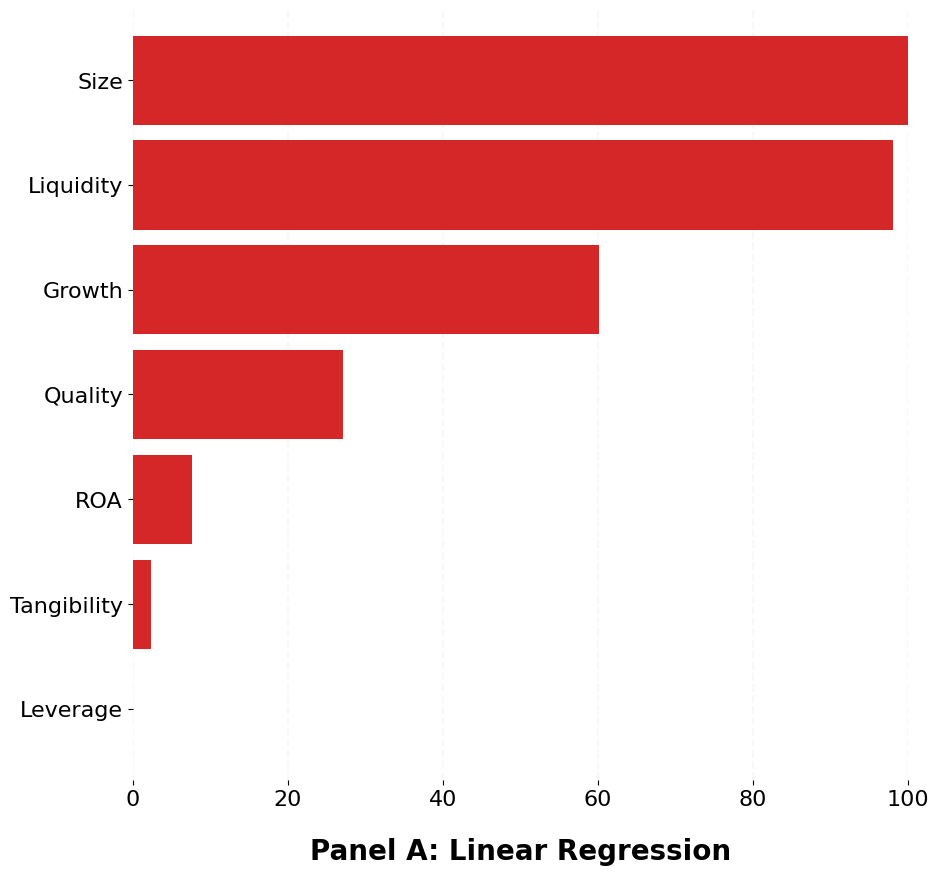

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#d62728', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel A: Linear Regression", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_LM.png')

In [11]:
from sklearn.linear_model import Lasso

data['Lasso'] = []

model = Lasso(alpha=0.0001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

print(sum_pred)
print(sum_avg)

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["Lasso"].append(round(r_squared*100, 4))
data["Lasso"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

coefficients = model.coef_
print(coefficients)
# Get the variable names
variable_names =  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']

# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# Print the variable importance
print(variable_importance)

1.0642235398782907
1.8271713935465543
R-squared 0.41755680740347834
RMSE 0.014780882498309592
[ 0.00454362  0.05914775  0.31834464  0.          0.16843469  0.00658304
 -0.29276782]
      Variable  Coefficient
3          ROA         0.00
0     Leverage         1.43
5  Tangibility         2.07
1      Quality        18.58
4       Growth        52.91
6    Liquidity        91.97
2         Size       100.00


/tmp/ipykernel_7264/3683564917.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


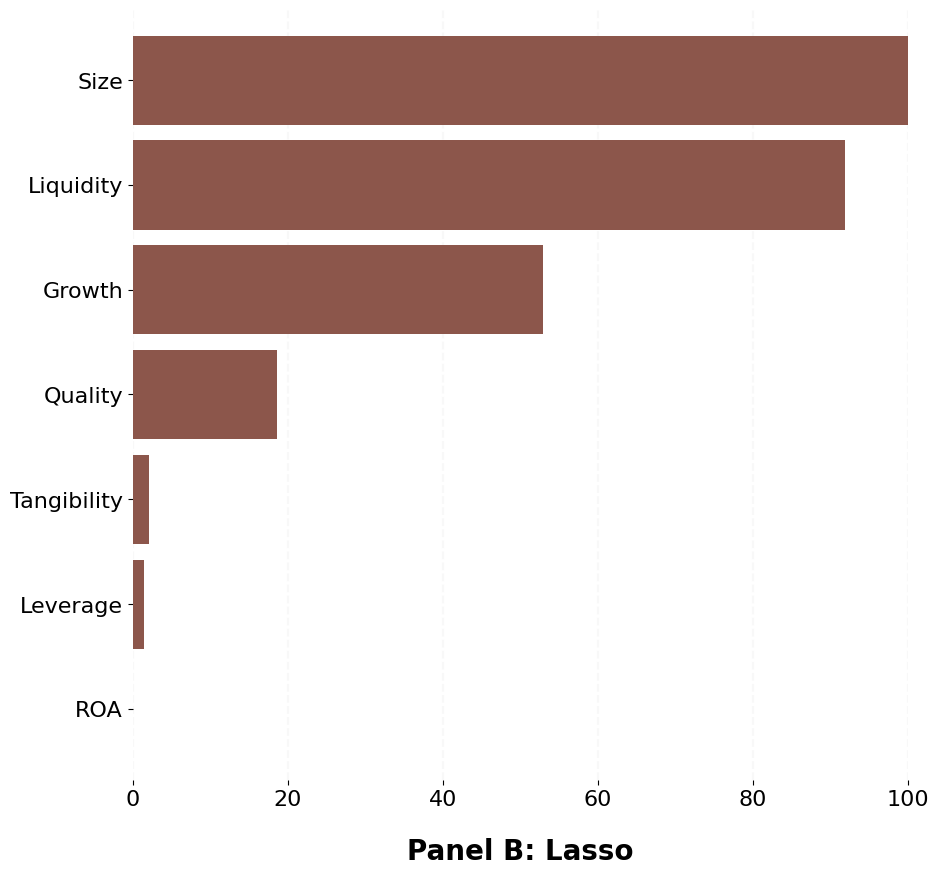

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#8c564b', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel B: Lasso", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_Lasso.png')

In [13]:
from pygam import LinearGAM

data["GAM"] = []
gam = LinearGAM()
gam.fit(X_train, y_train)
y_pred = gam.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2

r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
#  # print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["GAM"].append(round(r_squared*100, 4))
data["GAM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

 # compute variable importance
variable_names = ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity']

coefs = gam.coef_

# Create a DataFrame of variable names and their corresponding coefficients
variable_importance = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefs[0:7]})

# Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)

R-squared -0.8133940775612836
RMSE 0.04601919144092665
      Variable  Coefficient
3          ROA        11.59
2         Size        21.88
4       Growth        23.25
1      Quality        31.63
6    Liquidity        42.93
5  Tangibility        47.59
0     Leverage       100.00


/tmp/ipykernel_7264/3447420446.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


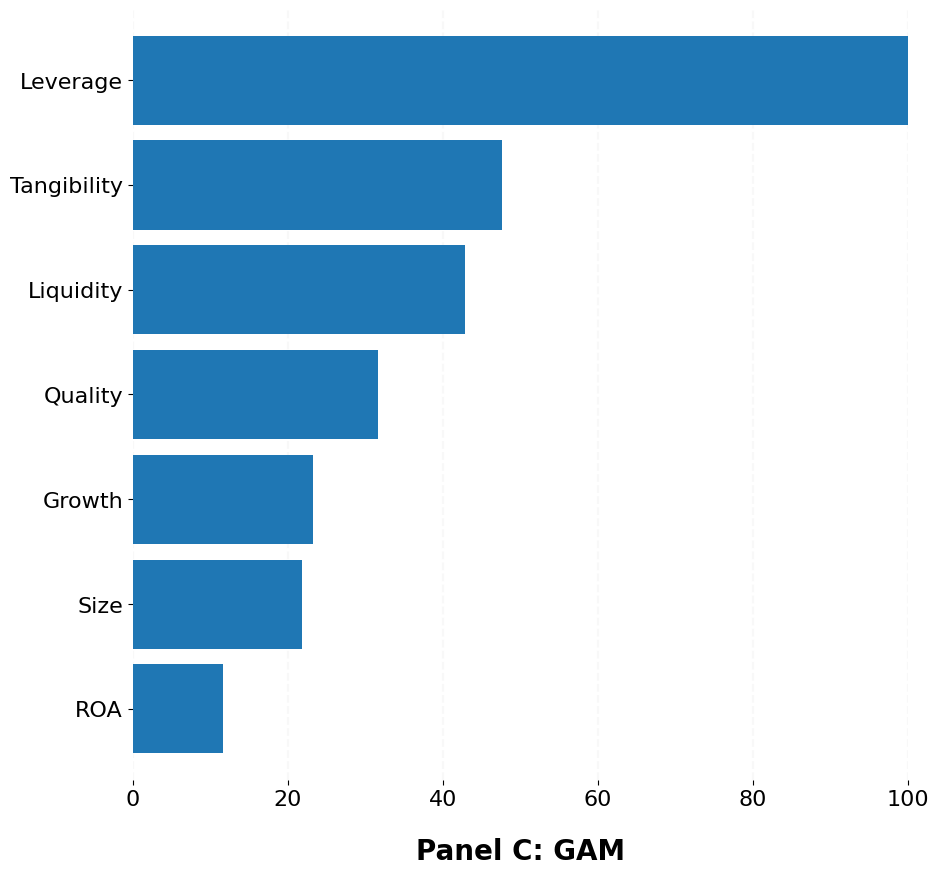

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#1f77b4', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel C: GAM", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_GAM.png')

In [15]:
from sklearn.ensemble import RandomForestRegressor

data["RF"] = []
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2


r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
data["RF"].append(round(r_squared*100, 4))
data["RF"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

importances = model.feature_importances_

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable':  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)


R-squared 0.6948632912208217
RMSE 0.007743570352809172
      Variable  Coefficient
5  Tangibility         4.20
4       Growth         5.46
3          ROA         7.11
1      Quality         8.63
6    Liquidity         9.98
0     Leverage        20.81
2         Size       100.00


/tmp/ipykernel_7264/205430632.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


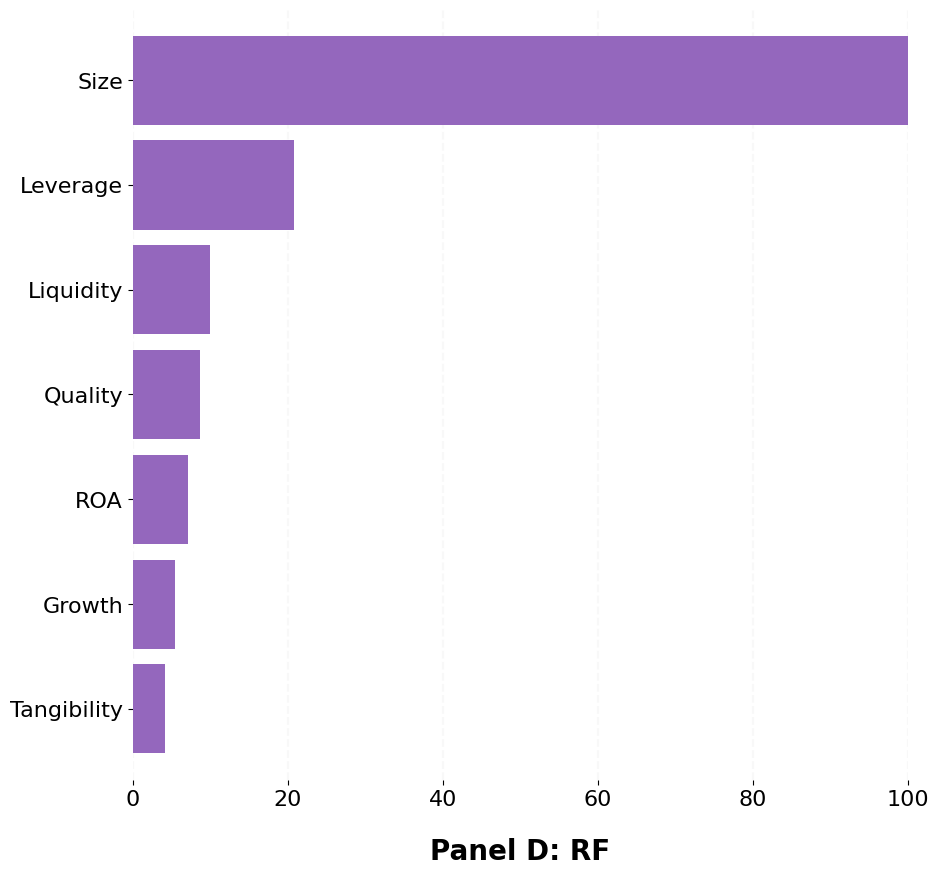

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#9467bd', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel D: RF", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_RF.png')

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

data["GBM"] = []

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2


r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

# print the model coefficients
# print('Intercept:', model.intercept_)
 # print('Coefficients:', model.coef_)
data["GBM"].append(round(r_squared*100, 4))
data["GBM"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)

importances = model.feature_importances_

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable':  ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

print(variable_importance)

R-squared 0.75569384120985
RMSE 0.006199850341786172
      Variable  Coefficient
5  Tangibility         2.54
6    Liquidity         7.88
1      Quality         9.10
3          ROA         9.95
4       Growth        10.43
0     Leverage        23.61
2         Size       100.00


/tmp/ipykernel_7264/2019429249.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


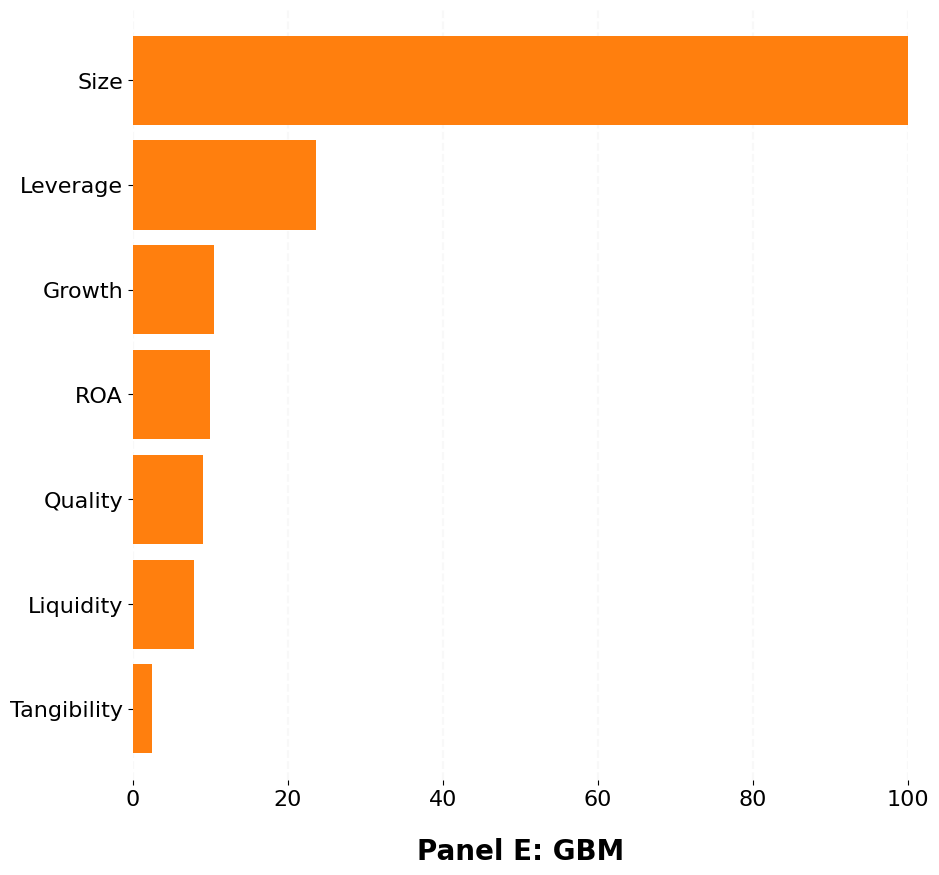

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#ff7f0e', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel E: GBM", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_GBM.png')

In [19]:
from sklearn.neural_network import MLPRegressor

data["NNET"] = []
importances_over_time = []

model = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sum_pred = 0
sum_avg = 0
for j in range(len(y_test)):
    sum_pred += (y_test.iloc[j] - y_pred[j])**2
    sum_avg += (y_test.iloc[j] - y_test.mean())**2


r_squared = (1 - sum_pred/sum_avg)
# Tính toán RMSE
rmse = sum_pred/len(X_test)

importances = abs(model.coefs_[0]).sum(axis=1)
importances = importances / max(importances) * 100
# importances_over_time.append(importances.round(4))

# print the model coefficients
data["NNET"].append(round(r_squared*100, 4))
data["NNET"].append(round(rmse, 7))
print('R-squared', r_squared)
print('RMSE', rmse)


importances = abs(model.coefs_[0]).sum(axis=1)

# create a dataframe of feature importances and sort by importance
variable_importance = pd.DataFrame({'Variable': ['Leverage', 'Quality', 'Size', 'ROA', 'Growth', 'Tangibility', 'Liquidity'], 'Coefficient': importances})

# # Sort the DataFrame by absolute coefficient values
variable_importance = variable_importance.reindex(variable_importance['Coefficient'].abs().sort_values(ascending=True).index)

variable_importance['Coefficient'] = variable_importance['Coefficient'].abs()
variable_importance['Coefficient'] = round(variable_importance['Coefficient'] / variable_importance['Coefficient'].max() * 100, 2)

# print(importances_over_time)

R-squared 0.7905888739663665
RMSE 0.005314305819153156


/home/notta/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


/tmp/ipykernel_7264/4144608735.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)


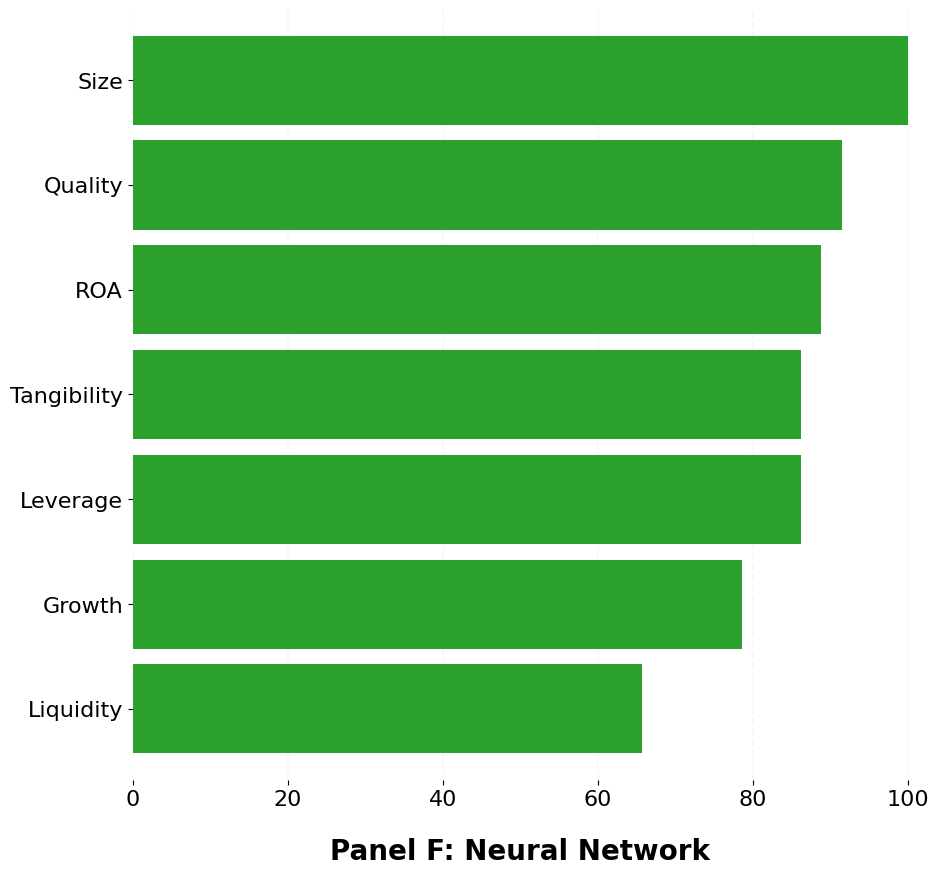

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = variable_importance['Coefficient'].plot(kind='barh', figsize=(8, 10), color='#2ca02c', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
# ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Define the new y-tick labels
new_yticklabels = variable_importance['Variable'].values

# Set the new y-tick labels
ax.set_yticklabels(new_yticklabels, fontsize=16)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=16)
ax.set_xlim([0, 100])

# Set x-axis label
ax.set_xlabel("Panel F: Neural Network", labelpad=20, weight='bold', size=20)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.gcf().set_size_inches(10, 10)
plt.savefig(name + '_EV_NNET.png')

In [21]:
data

{'LM': [42.2004, 0.014668],
 'Lasso': [41.7557, 0.0147809],
 'GAM': [-81.3394, 0.0460192],
 'RF': [69.4863, 0.0077436],
 'GBM': [75.5694, 0.0061999],
 'NNET': [79.0589, 0.0053143]}